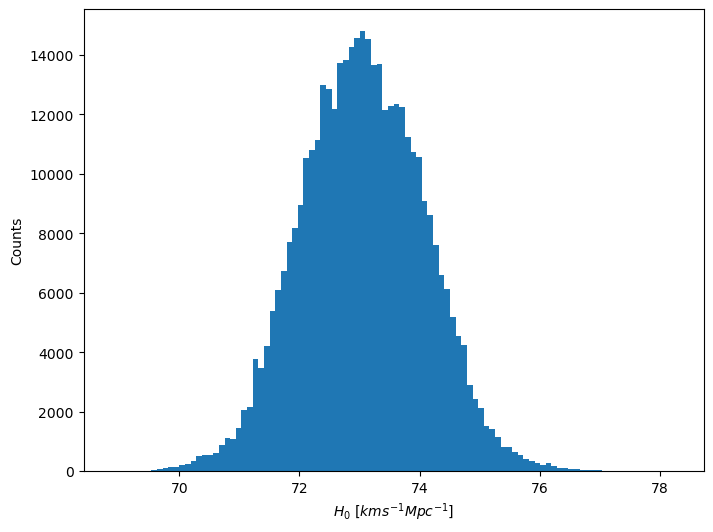

In [47]:
'''
read_chains_example.py: an example to read MCMC chains generated by run_mcmc.py.
Y.S.Murakami 2022 @ JHU
'''

import numpy as np
import matplotlib.pyplot as plt
import h5py

###### config ######
CHAIN_PATH = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/final_v2_baseline.h5' 
#this file ^ is currently being uploaded to Zenodo
#in the meantime it is available here https://www.dropbox.com/s/um0oi1xglstii2y/final_v2_baseline.h5.gz?dl=0

BURNIN = 6000
####################

# Data is big. Select indices that you are interested in.
idx = [37,38,39,40,41,42,43,45,46]
idx = np.asarray(idx)

# Load data
samples = h5py.File(CHAIN_PATH,'r')['mcmc']['chain'][:,:,idx]

# The loaded chains are raw (=uncut) and you need to apply burnin.
# For the discussion on burnin-size, see Sec. 5.1 (MCMC Sampling) of the SH0ES paper.
samples_burnin = samples[BURNIN:,:,:]

# Once the burnin is applied, one can flatten the chains
# Don't forget to apply formula to obtain the physical quantity.
H0_idx = -1
fivelogH0 = samples_burnin[:,:,H0_idx].flatten()
H0_samples = 10**(fivelogH0/5)

# Now it's ready for analyses/plotting!
plt.figure(figsize=(8,6))
counts, bin_edges, _ = plt.hist(H0_samples,bins=100)
plt.xlabel(r'$H_0$ $[km s^{-1} Mpc^{-1}]$')
plt.ylabel('Counts')
plt.show()


In [43]:
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
mean_from_histogram = np.average(bin_centers, weights=counts)
print('Mean from histogram:',mean_from_histogram)

Mean from histogram: 73.0590863429256


In [44]:
total_points = np.sum(counts)
print('Total points:',total_points)

Total points: 400000.0
